# Youkea Cost Accounting Analysis
## Activity-Based Costing (ABC) Analysis

### Problem Overview
Youkea's Boston branch needs to assess the profitability of different business customers using activity-based costing instead of simple volume-based overhead allocation.

### Key Information:
1. **Order Processing Methods:**
   - Web orders (automated)
   - Phone orders (manual entry)

2. **Delivery Methods:**
   - Common carrier (cost based on number of chairs)
   - Express delivery (cost based on number of shipments)

3. **Volume Statistics:**
   - Total orders: 700
   - Total chairs: 4,800
   - Phone orders: 20% of total orders (140 orders)
   - Phone order lines: 800
   - Express deliveries: 100 shipments (800 chairs)

4. **Financial Data:**
```
Sales:                      $2,400,000
Cost of purchased goods:    $1,400,000
Gross margin:               $1,000,000
Freight (Common carrier):   $350,000
Warehouse personnel:        $400,000
Other warehouse expenses:   $40,000
Delivery personnel:         $100,000
Other delivery expenses:    $10,000
Order entry expenses:       $20,000
Operating Income:           $80,000
```

---

In [1]:
# Required package installations (uncomment if needed)
# !pip install numpy
# !pip install pandas
# !pip install matplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Step 1: Calculate Order Entry Cost Rates

We know that:
- Phone orders represent 85% of total order entry costs
- Web orders represent 15% of total order entry costs
- Total order entry expenses = $20,000

In [2]:
# Order entry cost analysis
total_order_entry_cost = 20000
phone_order_cost = total_order_entry_cost * 0.85
web_order_cost = total_order_entry_cost * 0.15

# Calculate number of web orders
total_orders = 700
phone_orders = total_orders * 0.20
web_orders = total_orders * 0.80

# Calculate cost per order type
cost_per_phone_order_line = phone_order_cost / 800  # 800 phone order lines
cost_per_web_order = web_order_cost / web_orders

print(f"Cost Analysis for Order Entry:")
print(f"Cost per phone order line: ${cost_per_phone_order_line:.2f}")
print(f"Cost per web order: ${cost_per_web_order:.2f}")

Cost Analysis for Order Entry:
Cost per phone order line: $21.25
Cost per web order: $5.36


## Step 2: Analyze Delivery Costs

We need to separate costs between:
- Common carrier deliveries (based on number of chairs)
- Express deliveries (based on number of shipments)

In [3]:
# Delivery cost analysis
total_chairs = 4800
express_chairs = 800
common_carrier_chairs = total_chairs - express_chairs

# Common carrier costs
common_carrier_cost = 350000
cost_per_chair_common = common_carrier_cost / common_carrier_chairs

# Express delivery costs
express_delivery_cost = 100000 + 10000  # Delivery personnel + Other delivery expenses
express_deliveries = 100
cost_per_express_delivery = express_delivery_cost / express_deliveries

print(f"Delivery Cost Analysis:")
print(f"Cost per chair (common carrier): ${cost_per_chair_common:.2f}")
print(f"Cost per express delivery: ${cost_per_express_delivery:.2f}")

Delivery Cost Analysis:
Cost per chair (common carrier): $87.50
Cost per express delivery: $1100.00


## Step 3: Warehouse Cost Analysis

Warehouse costs are driven by throughput (number of chairs)

In [4]:
# Warehouse cost analysis
warehouse_personnel_cost = 400000
other_warehouse_expenses = 40000
total_warehouse_cost = warehouse_personnel_cost + other_warehouse_expenses

# Cost per chair for warehouse operations
warehouse_cost_per_chair = total_warehouse_cost / total_chairs

print(f"Warehouse Cost Analysis:")
print(f"Warehouse cost per chair: ${warehouse_cost_per_chair:.2f}")

Warehouse Cost Analysis:
Warehouse cost per chair: $91.67


## Step 4: Compare Traditional vs. ABC Costing

Let's compare costs for two hypothetical customers:
1. Customer A: Orders 100 chairs in 2 web orders
2. Customer B: Orders 100 chairs in 20 phone orders (4 lines each) with express delivery

Cost Comparison:
                    Customer A    Customer B
ABC Cost          17927.380952  32866.666667
Traditional Cost  19166.666667  19166.666667


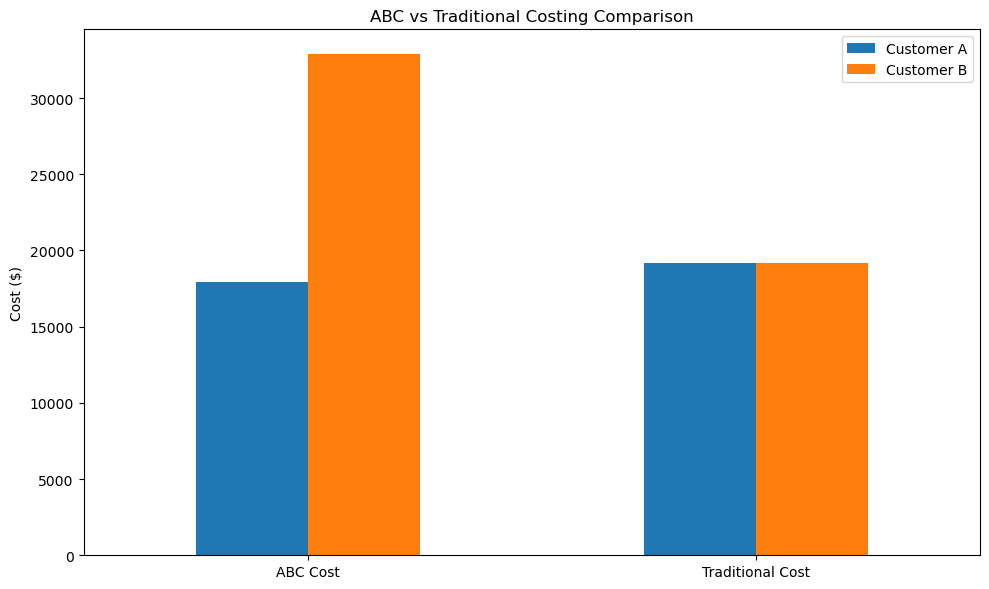

In [5]:
def calculate_customer_cost(chairs, web_orders, phone_order_lines, express_deliveries):
    # Order entry costs
    order_entry_cost = (web_orders * cost_per_web_order + 
                       phone_order_lines * cost_per_phone_order_line)
    
    # Delivery costs
    if express_deliveries > 0:
        delivery_cost = express_deliveries * cost_per_express_delivery
    else:
        delivery_cost = chairs * cost_per_chair_common
    
    # Warehouse costs
    warehouse_cost = chairs * warehouse_cost_per_chair
    
    return {
        'Order Entry Cost': order_entry_cost,
        'Delivery Cost': delivery_cost,
        'Warehouse Cost': warehouse_cost,
        'Total Cost': order_entry_cost + delivery_cost + warehouse_cost
    }

# Calculate costs for both customers
customer_a = calculate_customer_cost(chairs=100, web_orders=2, phone_order_lines=0, express_deliveries=0)
customer_b = calculate_customer_cost(chairs=100, web_orders=0, phone_order_lines=80, express_deliveries=20)

# Traditional volume-based costing
total_overhead = 920000  # Sum of all overhead costs
traditional_cost_per_chair = total_overhead / total_chairs

# Create comparison DataFrame
comparison = pd.DataFrame({
    'Customer A': [customer_a['Total Cost'], traditional_cost_per_chair * 100],
    'Customer B': [customer_b['Total Cost'], traditional_cost_per_chair * 100]
}, index=['ABC Cost', 'Traditional Cost'])

print("Cost Comparison:")
print(comparison)

# Visualize the comparison
comparison.plot(kind='bar', figsize=(10, 6))
plt.title('ABC vs Traditional Costing Comparison')
plt.ylabel('Cost ($)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Conclusions

Our analysis reveals several important insights:

1. **Order Entry Costs:**
   - Phone orders are significantly more expensive to process per order due to manual entry
   - Web orders are more cost-efficient due to automation

2. **Delivery Costs:**
   - Express deliveries have a fixed cost per shipment
   - Common carrier costs scale linearly with the number of chairs

3. **Cost Distortion:**
   - Traditional volume-based costing significantly distorts the true cost of serving different customers
   - Customers with similar volumes can have very different actual costs based on their ordering and delivery patterns

4. **Recommendations:**
   - Encourage web ordering over phone ordering
   - Optimize express delivery by consolidating orders when possible
   - Consider pricing strategies that reflect the true cost of serving different customer types